## Simpler figure variants with just aggregated temperature scenarios for three levels [1.5, 2.2 and 2.8] (Sept 2024)
--> figures described in [v2024_README.md](v2024_README.md)

In [65]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import oggm
from matplotlib.colors import LinearSegmentedColormap

matplotlib.rcParams['figure.figsize'] = (14, 8)

In [66]:
sel_temp = [1.5,2.2,2.8] 
# could be other levels, However, we selected here warming levels where the median of the climate scenarios 
# within +/-0.2°C (climate models + SSP/RCP scenarios) is also the middle of the selected range

In [15]:
rgi_regs_global = ['global','01', '02', '03', '04', '05', '06', '07',
                   '08', '09', '10', '11', '12', '13', '14', '15',
                   '16', '17', '18', '19']
rgi_regs_global.append('13-14-15')
p = ''

colors_icci_l3 = ['#70B8FF', '#FABB00', '#F25100', '#D42300', '#B3001E', '#800040', '#550066', '#2B084D']
cmap_icci_3 = LinearSegmentedColormap.from_list('bins_100', colors_icci_l3, N=10000)


path_oggm = f'{p}glacier_model_csv_files/OGGM/'
path_glogem = f'{p}glacier_model_csv_files/GloGEM/'
path_pygem =  f'{p}glacier_model_csv_files/PyGEM-OGGM/'

path_d = {}
path_d['OGGM']  = path_oggm
path_d['GloGEM'] = path_glogem
path_d['PyGEM-OGGM'] = path_pygem

In [20]:
# this is where we extracted the global climate change data from:
# IMPORTANT, here we use now the IPCC AR6 estimate of warming between 1850-1900 and 1986-2005 !!!
# https://cluster.klima.uni-bremen.de/~oggm/oggm-standard-projections/analysis_notebooks/global_gcm_climate_cmip6_cmip5.ipynb

# save the files in a subfolder under oggm_cluster_data
from oggm import cfg
cfg.PATHS['working_dir'] = oggm.utils.get_temp_dir()
try:
    import oggm
    dpath = 'https://cluster.klima.uni-bremen.de/~oggm/oggm-standard-projections/analysis_notebooks'
    _file_cmip5 = oggm.utils.file_downloader(f'{dpath}/Global_mean_temp_deviation_2071_2100_2081_2100_2271_2300_2281_2300_rel_1850_1900_cmip5_gcms_ipcc_ar6_def.csv',
                                             reset=True)
    _file_cmip6 = oggm.utils.file_downloader(f'{dpath}/Global_mean_temp_deviation_2071_2100_2081_2100_2271_2300_2281_2300_rel_1850_1900_cmip6_gcms_ipcc_ar6_def.csv',
                                             reset=True)
except:
    # you can also just download the file, 
    # e.g. via https://cluster.klima.uni-bremen.de/~oggm/oggm-standard-projections/analysis_notebooks/Global_mean_temp_deviation_2071_2100_2081_2100_2271_2300_2281_2300_rel_1850_1900_cmip5_gcms.csv
    # change this path to your local path 
    dpath = '/home/www/oggm/oggm-standard-projections/analysis_notebooks'
    _file_cmip5 = f'{dpath}/Global_mean_temp_deviation_2071_2100_2081_2100_2271_2300_2281_2300_rel_1850_1900_cmip5_gcms_ipcc_ar6_def.csv'
    _file_cmip6 = f'{dpath}/Global_mean_temp_deviation_2071_2100_2081_2100_2271_2300_2281_2300_rel_1850_1900_cmip6_gcms_ipcc_ar6_def.csv'
pd_cmip5_temp_ch_2100 = pd.read_csv(_file_cmip5, index_col=0)
pd_cmip5_temp_ch_2100['cmip'] = 'CMIP5'
pd_cmip6_temp_ch_2100 = pd.read_csv(_file_cmip6, index_col=0)
pd_cmip6_temp_ch_2100['cmip'] = 'CMIP6'

pd_cmip_temp_ch_2100 = pd.concat([pd_cmip6_temp_ch_2100, pd_cmip5_temp_ch_2100])
pd_cmip_temp_ch_2100 = pd_cmip_temp_ch_2100.loc[pd_cmip_temp_ch_2100.ssp != 'ssp534-over']
pd_cmip_temp_ch_2100_gcm_until_2300 = pd_cmip_temp_ch_2100.loc[pd_cmip_temp_ch_2100['global_temp_ch_2271-2300_preindustrial'].dropna().index]


100% of   4.6 KiB |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% of   8.0 KiB |######################| Elapsed Time: 0:00:00 Time:  0:00:00


1.487504187860568 6.334634111566688


In [61]:
pd_fit_data_all = pd.read_csv(f'fit_data_temp_evol_global_regional_oggm_pygem_glogem_oct182023.csv', index_col=0)
# correction for using now the IPCC AR6 estimates instead of IPCC SROCCC where global warming was 
# estimated to be 0.69°C vs 0.63°C from 1850-1900 to 1986-2005
pd_fit_data_all['global_temp_ch_2071-2100_preindustrial'] = pd_fit_data_all['global_temp_ch_2071-2100_preindustrial'] + 0.06
n_reg = len(pd_fit_data_all.region.unique())
assert n_reg == 21
# we have 2*24 GCMs from PyGEM and OGGM, and 12 from GloGEM -> i.e.,there should be 60 entry points per year
assert len(pd_fit_data_all.loc[pd_fit_data_all.year==2299])/n_reg == 2*24 + 12

assert np.all(pd_fit_data_all['rel_ice_%_2020']>=0)
assert np.all(pd_fit_data_all['rel_ice_%_2020']<=300)
print(pd_fit_data_all.region.unique())
print(pd_fit_data_all['global_temp_ch_2071-2100_preindustrial'].min(), pd_fit_data_all['global_temp_ch_2071-2100_preindustrial'].max())
print(pd_fit_data_all['model'].unique())
print(pd_fit_data_all['rel_ice_%_2020'].min(), pd_fit_data_all['rel_ice_%_2020'].max())
print(pd_fit_data_all['year'].min(), pd_fit_data_all['year'].max())


['global' 'RGI01' 'RGI02' 'RGI03' 'RGI04' 'RGI05' 'RGI06' 'RGI07' 'RGI08'
 'RGI09' 'RGI10' 'RGI11' 'RGI12' 'RGI13' 'RGI14' 'RGI15' 'RGI16' 'RGI17'
 'RGI18' 'RGI19' 'RGI13-14-15']
1.4875041878605682 6.334634111566688
['OGGM' 'PyGEM-OGGM' 'GloGEM']
0.0 273.0386630795257
2000 2300


In [62]:
pd_temp_ch_only_2300_both_no_os = pd_cmip_temp_ch_2100_gcm_until_2300.loc[pd_cmip_temp_ch_2100_gcm_until_2300.ssp!='ssp534-over']
temp = 'global_temp_ch_2071-2100_preindustrial'
temp_lev_d = {}
for t in sel_temp:
    t1,t2 = t-0.2, t+0.2
    _sel = pd_temp_ch_only_2300_both_no_os.loc[(pd_temp_ch_only_2300_both_no_os[temp]>=t1) & (pd_temp_ch_only_2300_both_no_os[temp]<=t2)]
    print(t, _sel[temp].median(), _sel[temp].mean(), _sel.index.values, len(_sel.index.values))
    _sel.index
    temp_lev_d[str(t)] = list(_sel.index)

# now select the timeseries ... 
gcms_cmip6 = pd.read_csv('/home/www/oggm/cmip6/all_gcm_list.csv', index_col=0)   
gcms_cmip5 = pd.read_csv('/home/www/oggm/cmip5-ng/all_gcm_list.csv', index_col=0).reset_index(drop=True)   

gcms_cmip6.index = gcms_cmip6.gcm.str.upper()+'_'+gcms_cmip6.ssp
gcms_cmip5.index = gcms_cmip5.gcm.str.upper()+'_'+gcms_cmip5.rcp
gcms_cmip = pd.concat([gcms_cmip6,gcms_cmip5])
gcms_cmip = gcms_cmip.loc[gcms_cmip.y1>=2299]



1.5 1.487504187860568 1.487504187860568 ['MPI-ESM-LR_rcp26'] 1
2.2 2.226892758161116 2.2268995837653662 ['ACCESS-ESM1-5_ssp126' 'IPSL-CM6A-LR_ssp126' 'MPI-ESM-LR_rcp45'
 'NORESM1-M_rcp45' 'CANESM2_rcp26' 'CESM1-CAM5_rcp26'] 6
2.8 2.781734634600584 2.7945587768169067 ['ACCESS-CM2_ssp126' 'CANESM5_ssp126' 'CSIRO-MK3-6-0_rcp45'
 'CESM1-CAM5_rcp45' 'CCSM4_rcp60'] 5


1.5 1
2.2 6
2.8 5


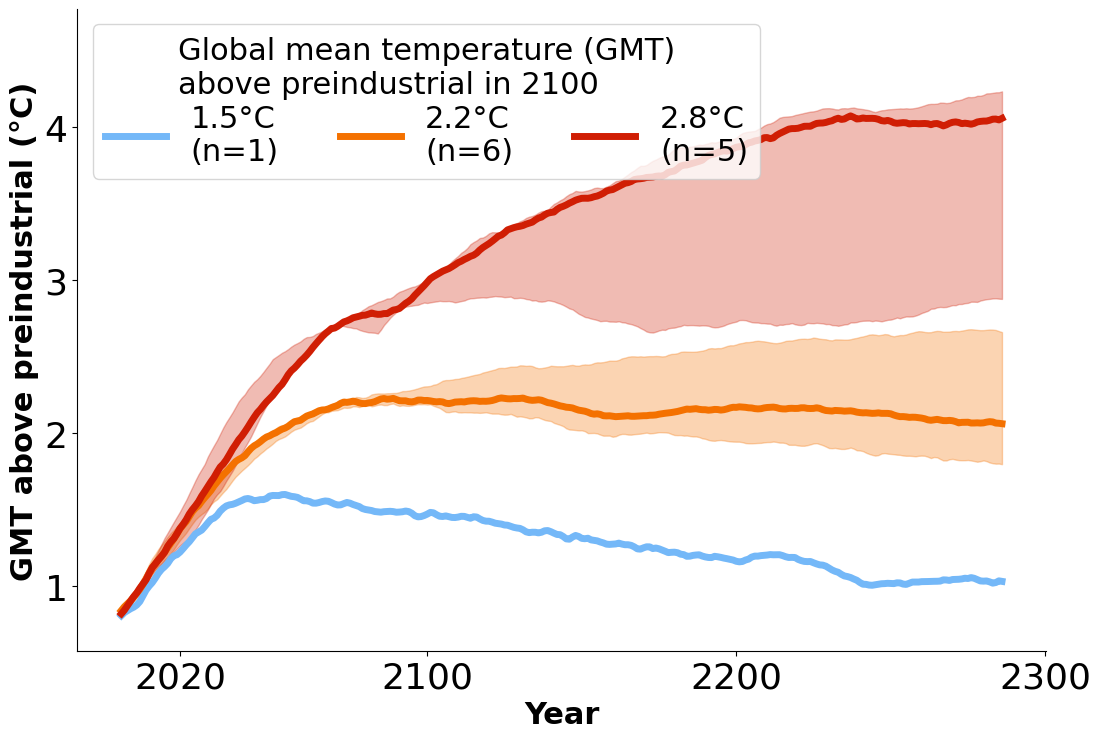

In [64]:
plt.rc('font', size=26)
fig, axs = plt.subplots(1,1, figsize=(12.5,25/3)) 

ax = axs
for t in sel_temp:
    
    _sel_gcms_cmip = gcms_cmip.loc[temp_lev_d[str(t)]]
    _sel_gcms_cmip=_sel_gcms_cmip.loc[_sel_gcms_cmip['var'] =='tas']
    print(t, len(_sel_gcms_cmip))
    pd_global_dtas_all = pd.DataFrame(index=np.arange(2000,2301))
    for f in _sel_gcms_cmip.index:
        dtas_annual = xr.open_dataset(_sel_gcms_cmip.loc[f]['path'],
                                      use_cftime=True).sel(time=slice('1986','2300')).tas.groupby('time.year').mean()
    
        weight = np.cos(np.deg2rad(dtas_annual.lat))
        weight = weight / weight.sum()
        global_dtas_per_year = (dtas_annual.mean(dim='lon') * weight).sum(dim='lat')
        avg_1986_2005 = global_dtas_per_year.sel(year=slice('1986','2005')).mean().values
        avg_2071_2100 = global_dtas_per_year.sel(year=slice('2071','2100')).mean().values
        past_warming = 0.69 # estimate from IPCC AR6 WG1 report 
        temperature_increase_2071_2100_rel_preindustrial = avg_2071_2100- avg_1986_2005 + past_warming
    
        # get the global means for every month:
        global_dtas_ch = (dtas_annual.mean(dim='lon') * weight).sum(dim='lat').rolling(year=30, center=True).mean() - avg_1986_2005 + past_warming
        #color= cmap(scaler.transform(temperature_increase_2071_2100_rel_preindustrial.reshape(-1,1))).flatten()
        # we don't want to show the individual lines
        color= cmap_icci_3(scaler_below45deg.transform(np.float64(t).reshape(-1,1))).flatten()
        ax.plot(global_dtas_ch.year, global_dtas_ch.values,
            lw=0, color=color, label=f'{t}°C' )
        pd_global_dtas_all[f] = global_dtas_ch.sel(year=slice(2000,2300)).values
    color= cmap_icci_3(scaler_below45deg.transform(np.float64(t).reshape(-1,1))).flatten()
    n=len(pd_global_dtas_all.columns)
    ax.plot(pd_global_dtas_all.index, pd_global_dtas_all.median(axis=1),
            lw=5, color=color, label=f'{t}°C\n(n={n})' )
    ax.fill_between(pd_global_dtas_all.index, 
                pd_global_dtas_all.quantile(0.25, axis=1), pd_global_dtas_all.quantile(0.75, axis=1), 
                alpha =0.3, color=color)
handles, labels = ax.get_legend_handles_labels()
ax.set_ylabel('GMT above preindustrial (°C)',fontweight = 'bold', fontsize=22)
plt.legend([handles[1], handles[8], handles[14]], 
           [labels[1], labels[8], labels[14]],
           title='Global mean temperature (GMT)\nabove preindustrial in 2100',
           labelspacing=0.15, ncol=3, 
                 title_fontsize=22, fontsize=22)
ax.set_xticks([2020,2100,2200,2300],[2020,2100,2200,2300])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Year',  fontweight = 'bold', fontsize=22)
plt.savefig('v2024_figures/png/v2024_simplified_climate_scenario_selection.png')
plt.savefig('v2024_figures/pdf/v2024_simplified_climate_scenario_selection.pdf')
plt.savefig('v2024_figures/svg/v2024_simplified_climate_scenario_selection.svg')

## Glacier projection figures...

In [44]:
# just to define the scaler/cmap, we scale the colorbar to be maximum at 4.5° 
pd_cmip_sel_below45deg = pd_cmip_temp_ch_2100_gcm_until_2300.loc[pd_cmip_temp_ch_2100_gcm_until_2300['global_temp_ch_2071-2100_preindustrial']<=4.5]
data_temp_bel45deg = pd_cmip_sel_below45deg['global_temp_ch_2071-2100_preindustrial'].values.reshape(1,-1).T
scaler_below45deg = MinMaxScaler()
scaler_below45deg.fit(data_temp_bel45deg)
t_min_bel45deg, t_max_bel45deg = pd_cmip_sel_below45deg['global_temp_ch_2071-2100_preindustrial'].min(), pd_cmip_sel_below45deg['global_temp_ch_2071-2100_preindustrial'].max()
print(t_min_bel45deg, t_max_bel45deg)

scaler = scaler_below45deg

1.487504187860568 4.4166525061210695


In [45]:
# region descriptions ...
d_reg_num_name = {}
d_reg_num_name['global'] = 'Global'
d_reg_num_name['01'] = 'Alaska'
d_reg_num_name['02'] = 'Western Canada & USA'
d_reg_num_name['03'] = 'Arctic Canada North'
d_reg_num_name['04'] = 'Arctic Canada South'
d_reg_num_name['05'] = 'Greenland Periphery'
d_reg_num_name['06'] = 'Iceland'
d_reg_num_name['07'] = 'Svalbard & Jan Mayen'
d_reg_num_name['08'] = 'Scandinavia'
d_reg_num_name['09'] = 'Russian Arctic'
d_reg_num_name['10'] = 'North Asia'
d_reg_num_name['11'] = 'Central Europe'
d_reg_num_name['12'] = 'Caucasus & Middle East'
d_reg_num_name['13'] = 'Central Asia'
d_reg_num_name['14'] = 'South Asia West'
d_reg_num_name['15'] = 'South Asia East'
d_reg_num_name['16'] = 'Low Latitudes'
d_reg_num_name['17'] = 'Southern Andes'
d_reg_num_name['18'] = 'New Zealand'
d_reg_num_name['13-14-15'] = 'High Mountain Asia'
d_reg_num_name['19'] = 'Subantarctic & Antarctic Islands'


In [46]:
selected_median = True
pi_range=50 

In [50]:
# this is the function for the new simplified plots... 
def median_temp_line_plot(region = 'global', sel=sel_temp,
                          pi_range=50,ax = None, cmap=cmap_icci_3):

    pd_fit_data_all_global = pd_fit_data_all.loc[pd_fit_data_all.region==region]
    for t in sel: 
        t1,t2 = t-0.2, t+0.2
        _sel=pd_fit_data_all_global.loc[(pd_fit_data_all_global['global_temp_ch_2071-2100_preindustrial']>=t1)&(pd_fit_data_all_global['global_temp_ch_2071-2100_preindustrial']<=t2)]
        temp = np.round(_sel['global_temp_ch_2071-2100_preindustrial'].median(),
                        1)
        if region=='global':
            print('median:', temp)
        colors_fit = cmap(_scaler.transform(temp.reshape(-1,1))).squeeze() 
        ### n is now the amount of experiments * 
        n=len(_sel.loc[_sel.year==2300]) 
        ###len(_sel['global_temp_ch_2071-2100_preindustrial'].unique())
        
        sns.lineplot(data = _sel.loc[_sel.year>2020],
                     x='year',
                     y='rel_ice_%_2020',
                     estimator='median',
                     errorbar=('pi',pi_range),
                     color=colors_fit,
                     label=f'{temp}°C (n={n})',
                     alpha = 0.5, 
                      lw=6,ax=ax,
                    )
        sns.lineplot(data = _sel.loc[_sel.year<=2020],
                     x='year',
                     y='rel_ice_%_2020',
                     estimator='median',
                     errorbar=('pi',pi_range),
                     color='black',
                     #label=f'{temp}°C (n={n})',
                     alpha = 0.5, 
                      lw=6,ax=ax,
                    )
    leg = ax.legend(loc='upper right', #center',
              labelspacing=0.15, 
              title = 'Global mean\ntemperature above\npre-industrial in 2100', 
             title_fontsize=22, fontsize=22,
             )
    leg.get_frame().set_alpha(0.6)  # Set alpha for the legend background
    #ax = plt.gca()
    #ax.set_ylabel('Remaining glacier ice\n(%, rel. to 2020)')


median: 1.5
median: 2.2
median: 2.8


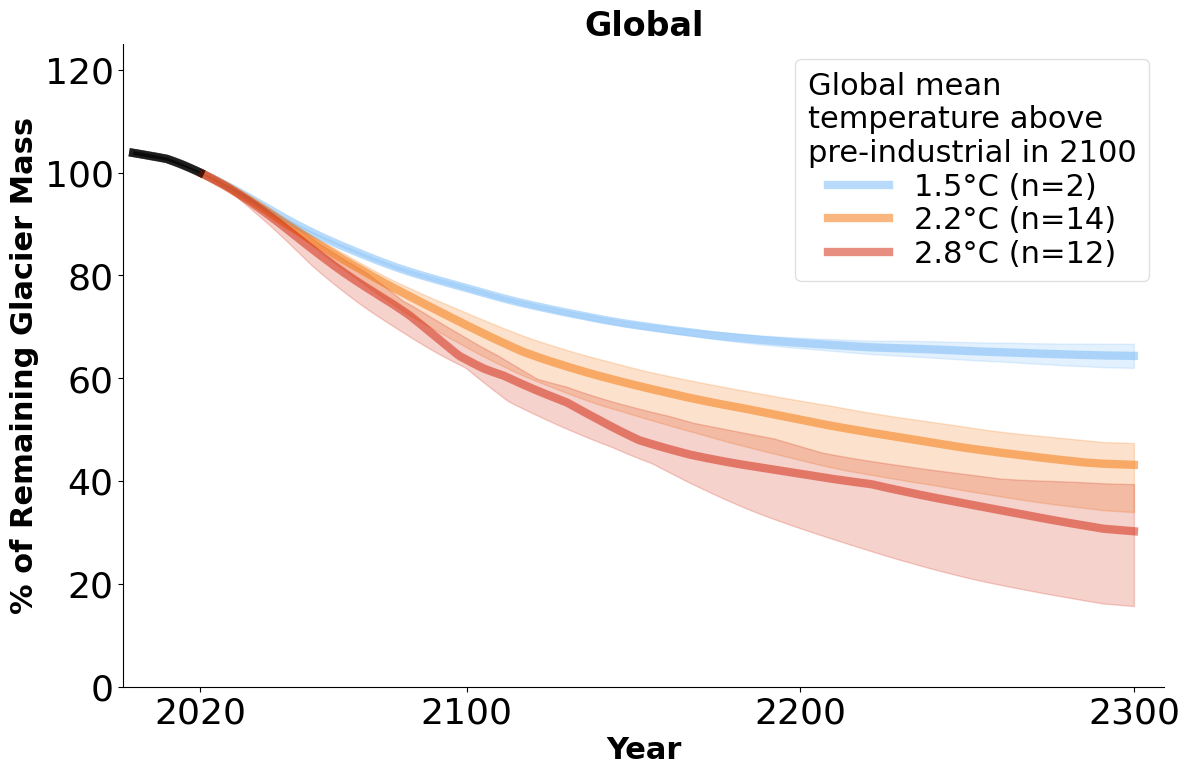

In [51]:

v = 3
vv = f'v{v}_below45deg'
add_median = True
only_below45deg = True
#################################################
_scaler = scaler_below45deg  
cmap = cmap_icci_3

###
caption_text = 'colors describe global temperature\nchange in 2100 from +1.4°C to +4.5°C'
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
################################################################
color_continuous = True
decile_ticks = True
plt.rc('font', size=26)
it = 1
frac_dict = {}
uncertainty = 'no_lowess_fit'
sel_temp

num_fits = 1000 
delta_text = 4
xlim1 = 2309

for jj,_rgi_reg in enumerate(list(d_reg_num_name.keys())): 
    fig, axs = plt.subplots(1,1, figsize=(12.5,25/3)) 
    axs = [axs]
    # figure to show caption
    ax_f = axs[0] 
    ax = axs[0]
    
    list_index_l = []
    err_l = []
    for m in path_d.keys():
        list_index_l.append(list(pd_cmip_temp_ch_2100.index + '_' + m))

    if _rgi_reg !='global':
        rgi_reg = f'RGI{_rgi_reg}'
    else:
        rgi_reg = _rgi_reg 

    median_temp_line_plot(region = rgi_reg, sel=sel_temp, ax=ax, pi_range=pi_range)

    ax.set_ylim([0,125])
    ax.set_ylabel('% of Remaining Glacier Mass',# (relative to 2020)',
                  fontweight = 'bold', fontsize=22)
    
    ax.set_xlabel('Year',  fontweight = 'bold', fontsize=22)
    if not selected_median:
        handles, labels = ax.get_legend_handles_labels()
        for h in handles:
            h.set_linewidth(3)
        ax.legend(handles, labels,
                      handlelength=1,
                      title='Temperature change between 1850-1900 & 2071-2100:', ncol=5)
        
        ax.legend().remove()

    ax.set_title(d_reg_num_name[_rgi_reg], fontweight='bold', fontsize=24)
    
    ax.set_xlim([1997, xlim1])

    ax.set_xticks([2020,2100,2200,2300],[2020,2100,2200,2300])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    fig.tight_layout()

    fig.savefig(f'v2024_figures/png/simple_icci_report_2024_median_iqr_oggm_glogem_pygem_temp_levels_{rgi_reg}_{vv}_final_{uncertainty}_p{pi_range}.png')
    fig.savefig(f'v2024_figures/pdf/simple_icci_report_2024_median_iqr_oggm_glogem_pygem_temp_levels_{rgi_reg}_{vv}_final_{uncertainty}_p{pi_range}.pdf')
    fig.savefig(f'v2024_figures/svg/simple_icci_report_2024_median_iqr_oggm_glogem_pygem_temp_levels_{rgi_reg}_{vv}_final_{uncertainty}_p{pi_range}.svg')
    if rgi_reg != 'global':
        plt.close()

In [60]:
### climate model and scenario that is used for 1.5°C (unfortunately only one!)
#_temp_scenarios_2300 = pd_proj_2100_2300[['rel_ice_2300_RGI19','global_temp_ch_2071-2100_preindustrial']].dropna()
np.abs(pd_cmip6_temp_ch_2100['global_temp_ch_2071-2100_preindustrial'] -1.5).min(), np.abs(pd_cmip6_temp_ch_2100['global_temp_ch_2071-2100_preindustrial'] -1.5).idxmin()

(0.01033557121115991, 'CAMS-CSM1-0_ssp126')

### Now, let's just look into the lowess fits... 

In [55]:
p = '' # path is here

In [56]:
####################same as the 2023 version, now just a summary of the lowess fit results from 2023
# this is just an algorithm to select the lowess "frac"- parameter,
# which basiclly describes the fraction in-between which linearity is assumed
# we use this algorithm together with some expert knowledge choices
def select_frac_alg(sel_it, sim_year=2100):            
    repeat = True
    problem = False
    diff_min = 0
    min_add_q50 = 0
    while repeat:
        _sel = sel_it.loc[sel_it.year == sim_year].copy()
        if sim_year == 2300:
            # brute-force, rather try not to be completely linear for year 2300 
            _sel = _sel.loc[_sel.frac<=0.75]

        # also make sure to select a non-negative median
        # this does NOT work in some regions, we have to clip negative values afterwards ... 
        _sel = _sel.loc[(_sel['min_q50']>= -1+min_add_q50) | (_sel['min_q50'] >= _sel['min_q50'].max())]

        # first choose only those fracs that somehow are the most "monotonic" decreasing 
        min_q_diff = _sel[['min_q05_diff','min_q25_diff','min_q50_diff','min_q75_diff','min_q95_diff']].min(axis=1)

        _sel.loc[min_q_diff.index,'min_q_diff'] = min_q_diff.values
        max_min_q_diff = _sel['min_q_diff'].max()
        # we add -0.2 to allow not only the best "frac", but also others ... 
        _sel = _sel.loc[_sel['min_q_diff'] >= max_min_q_diff-0.2]

        _sel = _sel.loc[_sel.min_q50_diff>=-0.01-diff_min/5]
        _sel = _sel.loc[_sel.min_q95_diff>=-0.01-diff_min]
        _sel = _sel.loc[_sel.min_q75_diff>=-0.01-diff_min]
        _sel = _sel.loc[_sel.min_q25_diff>=-0.01-diff_min]
        _sel = _sel.loc[_sel.min_q05_diff>=-0.01-diff_min]

        _val = _sel.min_q50_diff.max() if _sel.min_q50_diff.max() <=0 else 0
        _sel = _sel.loc[_sel.min_q50_diff >=_val*1.01]

        _val = _sel.min_q50.max() if _sel.min_q50.max() <=0 else 0
        _sel = _sel.loc[_sel.min_q50 >=_val]
        _val = _sel.min_q05.max() if _sel.min_q05.max()<=0 else 0
        _sel = _sel.loc[_sel.min_q05 >=_val]
        if len(_sel) == 97:
            frac = np.round(_sel.frac.unique(),2)[0]
            repeat = False

        elif len(_sel)>97:
            frac = np.round(_sel.frac.unique().max(),2)
            _sel = _sel.loc[_sel.frac == _sel.frac.unique().max()]
            repeat = False
        else:
            repeat = True
            diff_min = diff_min + 0.01
        if max_min_q_diff <-0.35:
            repeat =True
            min_add_q50 -= 0.5
            if min_add_q50 < -5:
                repeat = False
                #frac = np.round(_sel.frac.unique().max(),2)
                #_sel = _sel.loc[_sel.frac == _sel.frac.unique().max()]
                problem = True

    repeat = True
    while problem:
        print(rgi_reg, 'problem')
        problem = False
        diff_min = 0
        min_add_q50 = 0
        while repeat:
            _sel = sel_it.loc[sel_it.year == sim_year].copy()
            if sim_year == 2300:
                # brute-force, ok, let's be a bit "more" linear
                _sel = _sel.loc[_sel.frac<=0.85]

            # also make sure to select a non-negative median
            # this does NOT work in some regions, we have to clip negative values afterwards ... 
            _sel = _sel.loc[(_sel['min_q50']>= -2+min_add_q50) | (_sel['min_q50'] >= _sel['min_q50'].max())]

            # first choose only those fracs that somehow are the most "monotonic" decreasing 
            min_q_diff = _sel[['min_q05_diff','min_q25_diff',
                               'min_q50_diff','min_q75_diff','min_q95_diff']].min(axis=1)

            _sel.loc[min_q_diff.index,'min_q_diff'] = min_q_diff.values
            max_min_q_diff = _sel['min_q_diff'].max()
            # we add -0.2 to allow not only the best "frac", but also others ... 
            _sel = _sel.loc[_sel['min_q_diff'] >= max_min_q_diff-0.2]

            _sel = _sel.loc[_sel.min_q50_diff>=-0.01-diff_min/5]
            _sel = _sel.loc[_sel.min_q95_diff>=-0.01-diff_min]
            _sel = _sel.loc[_sel.min_q75_diff>=-0.01-diff_min]
            _sel = _sel.loc[_sel.min_q25_diff>=-0.01-diff_min]
            _sel = _sel.loc[_sel.min_q05_diff>=-0.01-diff_min]

            _val = _sel.min_q50_diff.max() if _sel.min_q50_diff.max() <=0 else 0
            _sel = _sel.loc[_sel.min_q50_diff >=_val*1.01]

            _val = _sel.min_q50.max() if _sel.min_q50.max() <=0 else 0
            _sel = _sel.loc[_sel.min_q50 >=_val]
            _val = _sel.min_q05.max() if _sel.min_q05.max()<=0 else 0
            _sel = _sel.loc[_sel.min_q05 >=_val]
            if len(_sel) == 97:
                frac = np.round(_sel.frac.unique(),2)[0]
                repeat = False

            elif len(_sel)>97:
                frac = np.round(_sel.frac.unique().max(),2)
                _sel = _sel.loc[_sel.frac == _sel.frac.unique().max()]
                repeat = False
            else:
                repeat = True
                diff_min = diff_min + 0.02
            if max_min_q_diff <-0.5:
                repeat =True
                min_add_q50 -= 0.5
                if min_add_q50 < -5:
                    repeat = False
                    problem = True
                    frac = np.NaN

    print(rgi_reg, frac, min_add_q50, _sel['min_q50'].min(), max_min_q_diff)
    return frac, _sel
                

frac_2300_exp_decision = {'RGI03':0.95, 'RGI07':0.95, 'RGI09':0.8,   # RGI13 0.8 ok!
                          'RGI12':0.63, 'RGI14':0.56, 'RGI15':0.5, 'RGI19':0.59,
                          'RGI17':0.8, 'RGI18':0.8,'RGI02':0.8,  
                          'RGI16':0.7, 'RGI11':0.6, 'RGI08':0.7}

def select_frac_w_experts(sel_it, sim_year=2300):
    region = sel_it.region.unique()[0]
    if (region in frac_2300_exp_decision.keys()) and (sim_year == 2300):
        frac = frac_2300_exp_decision[region]
        _sel = sel_it.loc[sel_it.year == sim_year].copy()
        _sel = _sel.loc[_sel.frac.round(2) == frac]
    else:
        frac, _sel = select_frac_alg(sel_it, sim_year=sim_year)
    return frac, _sel

# this file has been merged in lowess_percentile_interval_fit_create_fit_data_and_merge_lowess_final_fit_files.ipynb
# the actual fits were computed by lowess_percentile_interval_fit_per_region.py
pd_fit_stats = pd.read_csv(f'{p}lowess_fit_stats_oct29_predi_all_it1.csv', index_col=0)



def boxplot_manual(qs= [0.1,0.5,1,2,3],
                   p = 2300, ax = None, j=0, temp_val = 1.5, _scaler=scaler, correct_to_ipcc_ar6=True,
                  widths=4.5, vert=True):
    q05, q25, q50, q75, q95 = qs
    
    if temp_val == None:
        c = 'grey'
    else:
        c = cmap(_scaler.transform(np.array([temp_val]).reshape(-1,1))).flatten()
    item = {}
    #item["label"] = 'box' # not required
    item["med"] = q50
    item["q1"] = q25
    item["q3"] = q75
    #item["cilo"] = 5.3 # not required
    #item["cihi"] = 5.7 # not required
    item["whislo"] = q05
    item["whishi"] = q95
    stats = [item]
    boxprops = dict(linestyle='-', linewidth=2, color=c)
    whisprops = dict(color=c, linewidth=1)
    flierprops = dict(marker='o', markerfacecolor='green', markersize=0,
                      markeredgecolor='none')
    medianprops = dict(linestyle='-', linewidth=4, color=c)
    ax.bxp(stats, positions = [p + j], showfliers = False,
           vert=vert,
            flierprops= flierprops, medianprops=medianprops, boxprops=boxprops,
             widths=widths, #patch_artist=True,
            whiskerprops=whisprops, capprops = dict(color=c, linewidth=1))

In [57]:
sim_year = 2300

In [58]:
_sel_sh_l = []
for rgi_reg in pd_fit_stats.region.unique(): 
    pd_fit_stats_reg = pd_fit_stats.loc[pd_fit_stats.region == rgi_reg]
    pd_fit_stats_reg_lowess = pd_fit_stats_reg.loc[pd_fit_stats_reg.fit_opt == 'lowess_predi']
    frac, _sel = select_frac_w_experts(pd_fit_stats_reg_lowess, sim_year=sim_year)
    ## correction from IPCC SROCC (0.63°C warming from 1850-1900 and 1986-2005) to 0.69°C warming in IPCC AR6
    # this will only work approximately because v2023 lowess fit was extracted in 0.05°steps,
    # but it is within +/-0.01°C, so it does not matter 
    _sel['deltaTemp_ipcc_ar6'] = _sel['deltaTemp']+0.06 
    # we just have to clip negative values .... there are still some although we tried to omit them by choosing the best frac ... 
    qs = ['q50', 'q05', 'q25', 'q75', 'q95']
    _sel_sh = _sel[['region', 'year', 'deltaTemp_ipcc_ar6','q50',
           'q05', 'q25', 'q75', 'q95']].reset_index(drop=True)
    _sel_sh[qs] = _sel_sh[qs].where(_sel_sh[qs]>=0, 0)
    _sel_sh_l.append(_sel_sh)
pd_lowess_stats_agg_2300 = pd.concat(_sel_sh_l)

global 0.45 0 0.4881256712591804 -0.18261132766947
RGI01 0.57 0 0.4378871108982666 -0.0461755604138239
RGI04 0.72 -0.5 -1.453974934319801 -0.1119918149230363
RGI05 0.64 0 -0.6349166509171063 -0.3024389572831554
RGI06 problem
RGI06 0.8 0 -1.6090488460476096 -0.2584169616942668
RGI10 0.52 0 -0.6288899289452097 -0.2626732102131575
RGI13 problem
RGI13 0.8 -1.5 -3.487859736807667 -0.290466212611608
RGI13-14-15 0.57 0 -0.0536211913880723 -0.3423459518639633


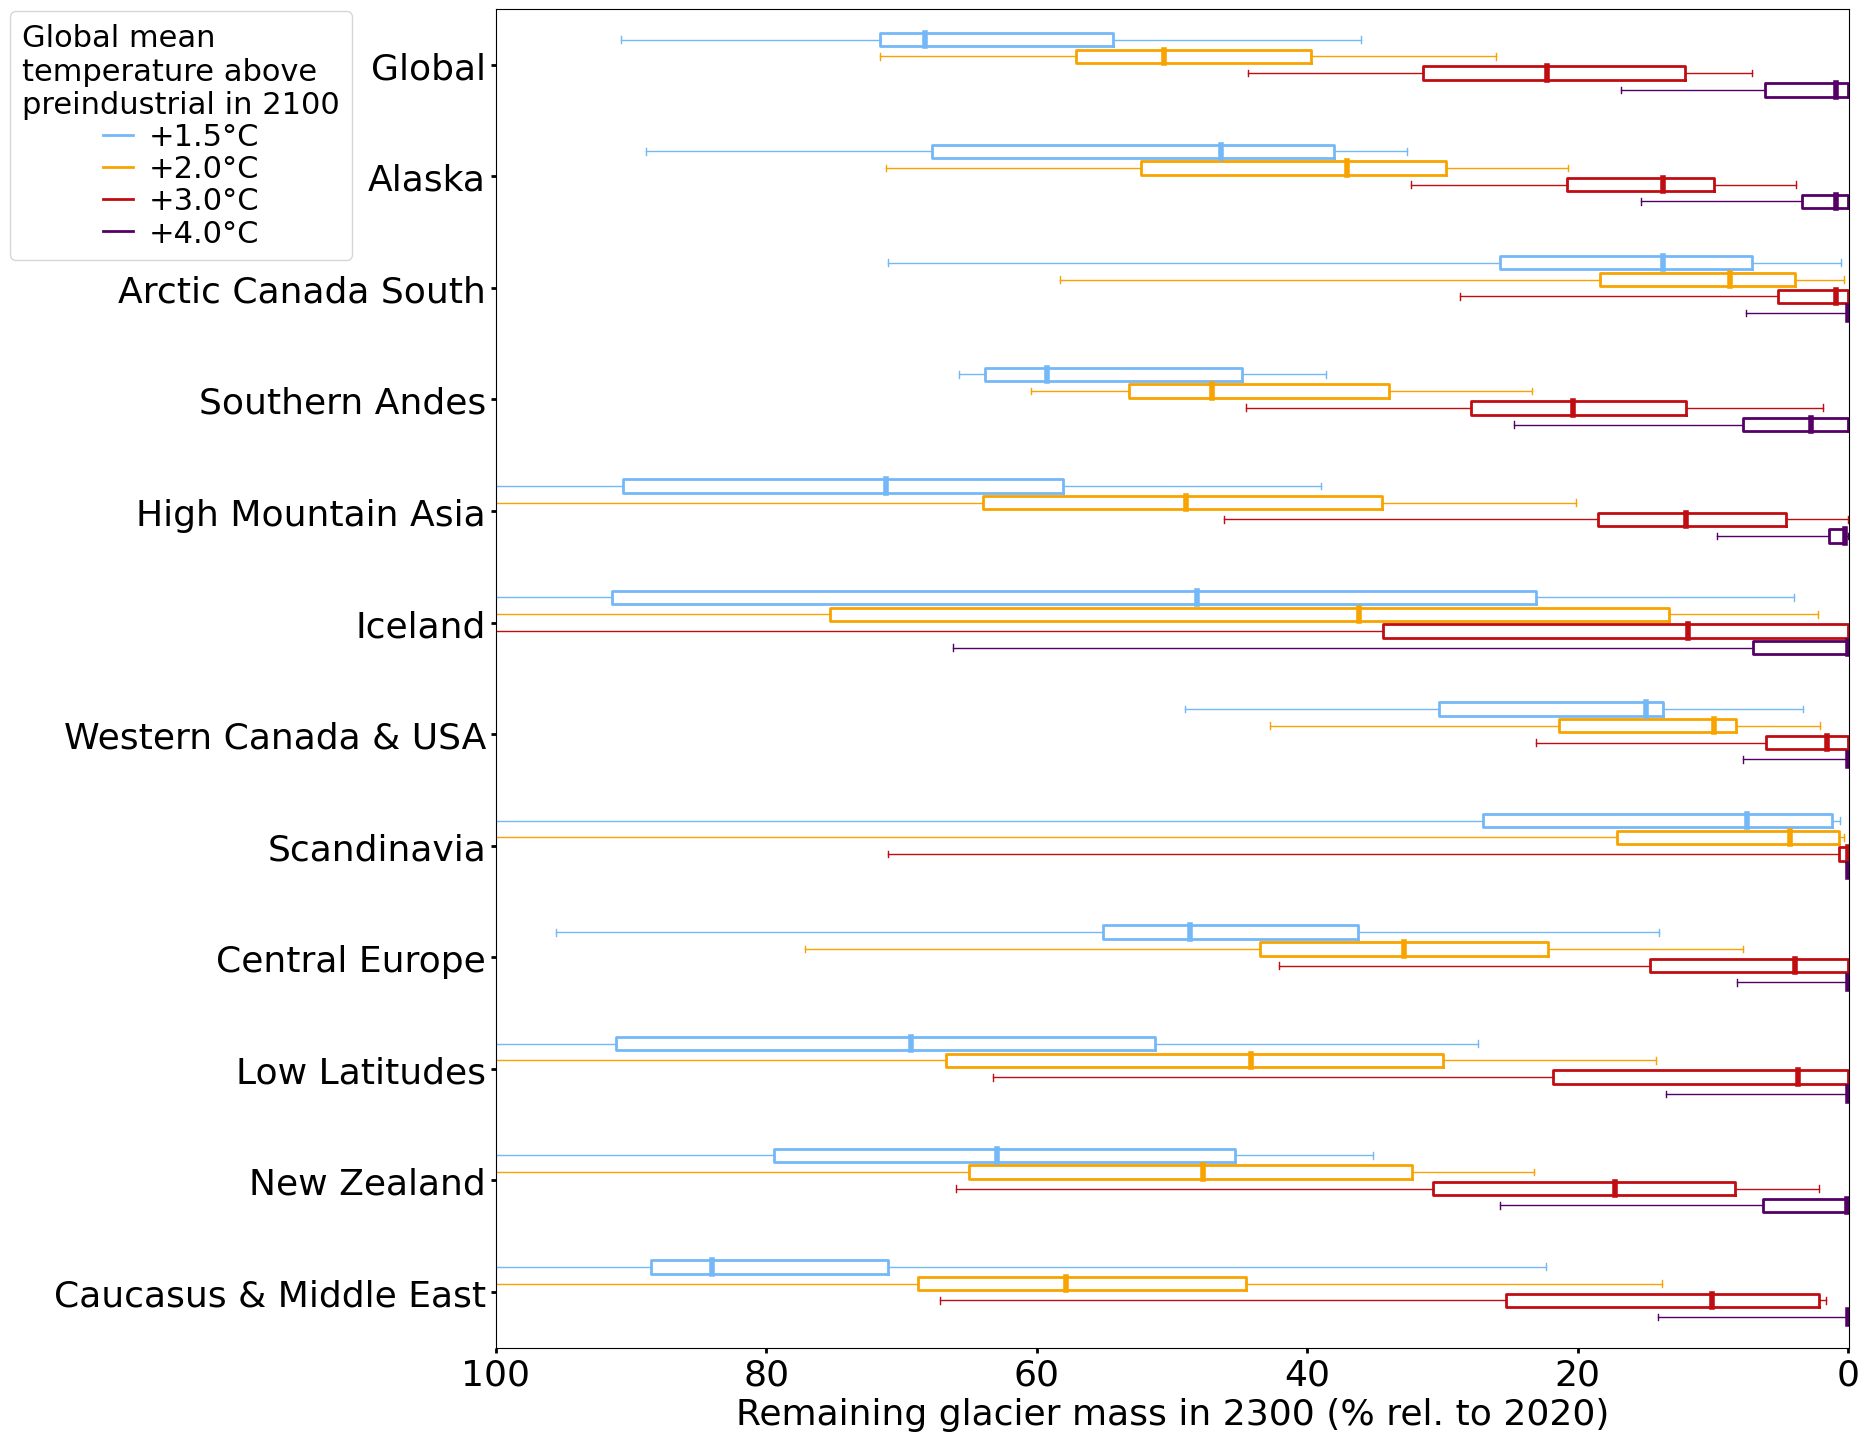

In [67]:
temp_l = [1.5, 2.0, 3.0,4.0]
plt.figure(figsize=(20,15))
ax = plt.gca()
xlabels_l = []
for r_e, _rgi_reg in enumerate(['global',
                '01','04','17', '13-14-15',
                '06', '02', '08', '11',  
                '16', '18', '12',
                ][::-1]): #):
    if _rgi_reg != 'global':
        rgi_reg = 'RGI'+_rgi_reg
    else:
        rgi_reg = _rgi_reg
    pd_lowess_stats_agg_2300_reg = pd_lowess_stats_agg_2300.loc[pd_lowess_stats_agg_2300.region==rgi_reg]
    c_l = []
    for jj, temp_sel in enumerate(temp_l):
        lowess_sel = pd_lowess_stats_agg_2300_reg.loc[np.abs(pd_lowess_stats_agg_2300_reg.deltaTemp_ipcc_ar6-temp_sel).idxmin()]
        #print(np.array([lowess_sel['q05'], lowess_sel['q25'], lowess_sel['q50'], lowess_sel['q75'], lowess_sel['q95']]).min())
        boxplot_manual(qs = [lowess_sel['q05'], lowess_sel['q25'], lowess_sel['q50'], lowess_sel['q75'], lowess_sel['q95']],
                       p = r_e, j = +0.225-jj*0.15, temp_val=temp_sel,  _scaler=scaler, ax=ax, widths=0.12, vert=False)
        c_l.append(cmap(scaler.transform(np.array([temp_sel]).reshape(-1,1))).flatten())
    ylab = d_reg_num_name[_rgi_reg]
    xlabels_l.append(ylab)

ax.set_yticks(np.arange(0,r_e+1,1), xlabels_l)
ax.set_ylim([-0.5,r_e+1-0.5])
ax.set_xlim([-0.1,100])
ax.set_xlabel('Remaining glacier mass in 2300 (% rel. to 2020)')

from matplotlib.lines import Line2D
# Create custom legend lines
legend_lines = []
data_l = []
for c,t in zip(c_l,temp_l):
    legend_lines.append(Line2D([0], [0], color=c, lw=2))
    data_l.append(f'+{str(t)}°C')

plt.tick_params(axis='x', width=2)  # Thicker x ticks
plt.tick_params(axis='y', width=2)  # Thicker y ticks

# Add the custom legend with labels
plt.legend(legend_lines, data_l, loc='upper left',    handletextpad=0.5,  # Space between legend handles and text
    labelspacing=0.1,   fontsize=22, bbox_to_anchor=(-0.37,1.01),     handlelength=1, title='Global mean\ntemperature above\npreindustrial in 2100',
          title_fontsize=22)  # Length of the legend handles) # Space between legend entries)
ax.invert_xaxis()
plt.tight_layout()
plt.savefig('v2024_figures/png/boxplot_lowess_fit_region_overview.png')
plt.savefig('v2024_figures/pdf/boxplot_lowess_fit_region_overview.pdf')
plt.savefig('v2024_figures/svg/boxplot_lowess_fit_region_overview.svg')